In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

%matplotlib inline

### 7

In [2]:
boston = pd.read_csv('../../data/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Create X, y objects
X = boston.drop('crim', axis=1)
y = boston.crim

# Split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state=100)

In [4]:
# Run random forest regression with basic hyperparameters
rf = RandomForestRegressor(n_estimators = 25, max_features=6)
rf_model = rf.fit(X_train,y_train)
rf_preds = rf_model.predict(X_valid)
score = mean_squared_error(y_valid, rf_preds)
print(score)

63.35186272757128


In [5]:
# Run random forest regression for a range of parameters. 
estimators = [25,50,100,200,400]
features = [4,6,8,10,12]
scores = []

for estimator,feature in zip(estimators,features):
    rf = RandomForestRegressor(n_estimators = estimator, max_features=feature, random_state=100)
    rf_model = rf.fit(X_train,y_train)
    rf_preds = rf_model.predict(X_valid)
    score = mean_squared_error(y_valid, rf_preds)
    scores.append(score)
    print(f'Number Estimators: {estimator} , Number Features: {feature}, MSE: {score}')

Number Estimators: 25 , Number Features: 4, MSE: 72.34128662933341
Number Estimators: 50 , Number Features: 6, MSE: 62.81708982137195
Number Estimators: 100 , Number Features: 8, MSE: 66.67054465668886
Number Estimators: 200 , Number Features: 10, MSE: 68.67855566865406
Number Estimators: 400 , Number Features: 12, MSE: 68.55335978846963


<IPython.core.display.Javascript object>


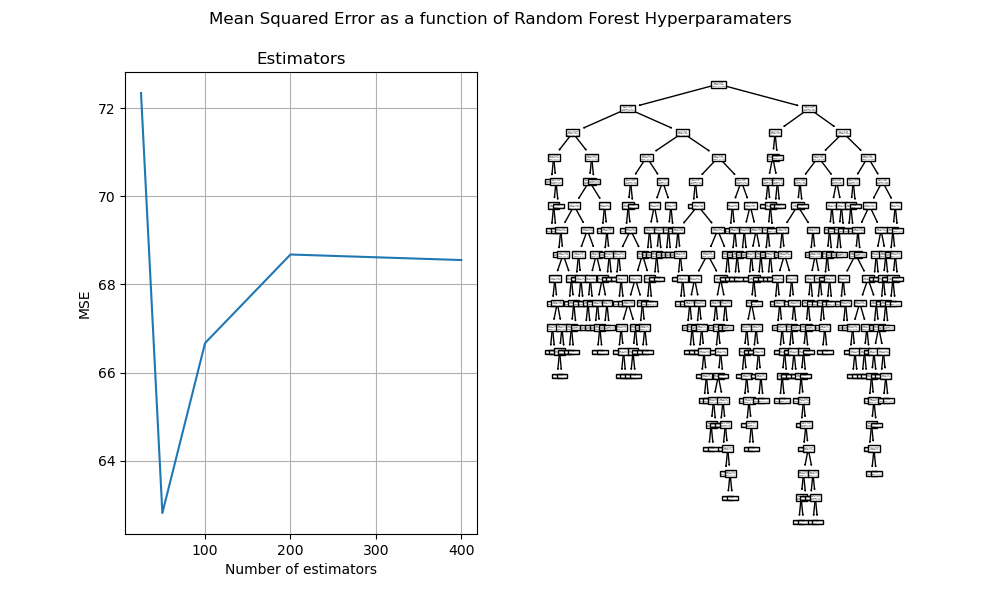

In [6]:
# Plot the errors as a function of the number of features and estimators
fig, axes = plt.subplots(1,2, figsize=(10,6), sharey=True)
axes[0].plot(estimators, scores, label = 'Mean Squared Error')
axes[1].plot(features, scores, label = 'Mean Squared Error')
axes[0].set(title="Estimators", xlabel='Number of estimators', ylabel='MSE')
axes[1].set(title='Features', xlabel = 'Number of features')
fig.suptitle('Mean Squared Error as a function of Random Forest Hyperparamaters')
for ax in axes:
    ax.grid(True)

### 8

In [ ]:
# Load data
carseats = pd.read_csv('../../data/Carseats.csv')
carseats.head()

In [ ]:
# Create X and Y objects
X = carseats.drop('Sales', axis=1)
X = pd.get_dummies(X)
y = carseats.Sales

# Split into training and test set 
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=100)

In [ ]:
# Fit Decision-Tree to the training data
dt = DecisionTreeRegressor(random_state=100)
dt_model = dt.fit(X_train,y_train)
dt_preds = dt_model.predict(X_valid)
score = mean_squared_error(y_valid,dt_preds)
print(f'Validation MSE: {score}')
importance = pd.Series(dt_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)

In [ ]:
# Optimizing the decision tree
n_components = list(range(1,X.shape[1]+1,1))
criterions = ['gini', 'entropy']
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)


params = {'max_depth': max_depths,
             'min_samples_split': min_samples_splits}

dt_GS = GridSearchCV(dt, params)
dt_GS_model = dt_GS.fit(X_train,y_train)

In [ ]:
# Re-run with optimized parameters
print(f'Best parameters: {dt_GS_model.best_params_}') 
dt_preds = dt_GS_model.predict(X_valid)
score = mean_squared_error(y_valid,dt_preds)
print(f'Validation MSE: {score}')

In [ ]:
# Bagging (Random Forest with features = total features)
n_features = X.shape[1]
rf = RandomForestRegressor(random_state=100, max_features=n_features)
rf_model = rf.fit(X_train,y_train)
rf_preds = rf_model.predict(X_valid)
score = mean_squared_error(y_valid,rf_preds)
print(f'Validation MSE: {score}')

In [ ]:
# Random Forest
rf = RandomForestRegressor(random_state=0)
rf_model = rf.fit(X_train,y_train)
rf_preds = rf_model.predict(X_valid)
score = mean_squared_error(y_valid,rf_preds)
print(f'Validation MSE: {score}')
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)

### 9

In [7]:
# Load data
oj = pd.read_csv('../../data/OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [8]:
# Conver response variable to 0,1 since sklearn can't handle categorical data
oj['Purchase'] = [1 if row == "CH" else 0 for row in oj.Purchase]
oj = pd.get_dummies(oj)

In [9]:
# Create X, y objects
X = oj.drop('Purchase', axis=1)
y = oj.Purchase

# Split into test and training set
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=100, test_size=0.2)

In [10]:
# Fit Decision Tree with no parameter tuning
dt = DecisionTreeClassifier(random_state=100)
dt_model = dt.fit(X_train,y_train)
dt_preds = dt_model.predict(X_train)
score = accuracy_score(dt_preds, y_train)
print(f'Training Set Accuracy: {score}')
print(f'Total Terminal Nodes: {dt_model.tree_.node_count}')

Training Set Accuracy: 0.9894859813084113
Total Terminal Nodes: 367


[Text(162.13358193277313, 211.7178947368421, 'X[8] <= 0.504\ngini = 0.474\nsamples = 856\nvalue = [331, 525]'),
 Text(75.89268907563026, 200.2736842105263, 'X[8] <= 0.278\ngini = 0.415\nsamples = 374\nvalue = [264, 110]'),
 Text(23.703277310924374, 188.82947368421054, 'X[8] <= 0.036\ngini = 0.229\nsamples = 174\nvalue = [151, 23]'),
 Text(5.6268907563025214, 177.38526315789474, 'X[11] <= 0.31\ngini = 0.032\nsamples = 61\nvalue = [60, 1]'),
 Text(3.3761344537815132, 165.94105263157894, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(7.877647058823531, 165.94105263157894, 'X[8] <= 0.004\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(5.6268907563025214, 154.49684210526317, 'X[0] <= 269.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(3.3761344537815132, 143.05263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(7.877647058823531, 143.05263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(10.128403361344539, 154.49684210526317, 'gini = 0.0\nsamples = 8\nva

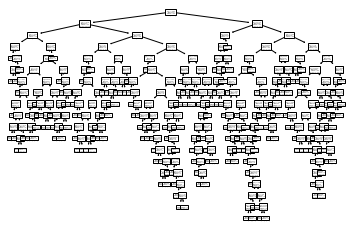

In [14]:
# Plot decision tree
plot_tree(dt_model)

In [17]:
# Get test set accuracy 
dt_preds = dt_model.predict(X_valid)
score = accuracy_score(dt_preds, y_valid)
print(f'Validation Set Accuracy: {score}')

# Confusion matrix
confusion_matrix(y_valid, dt_preds)

Validation Set Accuracy: 0.8411214953271028


array([[ 70,  16],
       [ 18, 110]])

In [21]:
# Optimizing decision-tree
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

params = {'max_depth': max_depths,
             'min_samples_split': min_samples_splits}

dt_GS = GridSearchCV(dt, params)
dt_GS_model = dt_GS.fit(X_train,y_train)
print(dt_GS_model.best_params_)
dt_preds = dt_GS_model.predict(X_valid)
score = accuracy_score(y_valid,dt_preds)
print(score)

{'max_depth': 3.0, 'min_samples_split': 0.1}
0.8504672897196262


[Text(0.5, 1.0, 'Validation accuracy vs # of trees'),
 Text(0.5, 0, 'Number of trees'),
 Text(0, 0.5, 'Accuracy Score')]

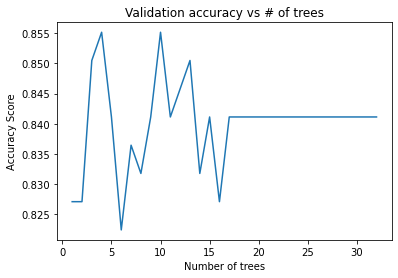

In [23]:
scores = []

for depth in max_depths:
    dt = DecisionTreeClassifier(random_state=100, max_depth=depth)
    dt_model = dt.fit(X_train,y_train)
    dt_preds = dt_model.predict(X_valid)
    score = accuracy_score(dt_preds, y_valid)
    scores.append(score)
    
fig, ax = plt.subplots(1,1)
ax.plot(max_depths,scores, label='Accuracy')
ax.set(title="Validation accuracy vs # of trees", xlabel='Number of trees', ylabel='Accuracy Score')

### 10

In [39]:
# Load dataset
hitters = pd.read_csv('../../data/Hitters.csv')
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [40]:
# Data cleaning
hitters = hitters.dropna(subset = ['Salary'])
hitters.Salary = np.log(hitters.Salary)
hitters = pd.get_dummies(hitters)

In [41]:
# Create X and y objects and split data
X = hitters.drop('Salary', axis=1)
y = hitters.Salary

X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=100, test_size=0.2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,6.163315,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,6.173786,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,6.214608,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,4.516339,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,6.620073,1,0,0,1,1,0


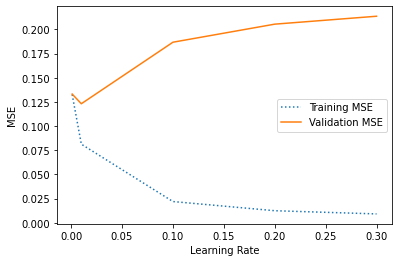

In [44]:
# Fit a Gradient Boosting Regressor
n_trees = 1000
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.3]

train_scores = []
valid_scores = []

for rate in learning_rates: 
    gbr = GradientBoostingRegressor(random_state=100, n_estimators = n_trees, learning_rate=rate)
    
    gbr_model = gbr.fit(X_train,y_train)
    
    gbr_train_preds = gbr_model.predict(X_train)
    gbr_train_score = mean_squared_error(y_train, gbr_train_preds)
    train_scores.append(gbr_train_score)
    
    gbr_valid_preds = gbr_model.predict(X_valid)
    gbr_valid_score = mean_squared_error(y_valid, gbr_valid_preds)
    valid_scores.append(gbr_valid_score)
    
fig, ax = plt.subplots(1,1)
ax.plot(learning_rates,train_scores, label = 'Training MSE', linestyle='dotted')
ax.plot(learning_rates,valid_scores, label = 'Validation MSE', linestyle='solid')
ax.set(xlabel = 'Learning Rate', ylabel = 'MSE')
ax.legend()

In [45]:
# Get feature importance
importance = pd.Series(gbr_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)

LoyalCH           0.689303
PriceDiff         0.081092
WeekofPurchase    0.053286
ListPriceDiff     0.030303
StoreID           0.024036
SalePriceMM       0.023028
SalePriceCH       0.019654
STORE             0.018304
PriceMM           0.013539
SpecialCH         0.012394
SpecialMM         0.007593
PctDiscMM         0.006876
PriceCH           0.006258
PctDiscCH         0.005456
Store7_Yes        0.003063
DiscMM            0.003022
DiscCH            0.001701
Store7_No         0.001092
dtype: float64

In [49]:
# Apply bagging instead of GBR
n_features = X.shape[1]
rf = RandomForestRegressor(random_state=100, max_features=n_features)
rf_model = rf.fit(X_train,y_train)
rf_preds = rf_model.predict(X_valid)
score = mean_squared_error(y_valid,rf_preds)
print(f'Validation MSE: {score}')

Validation MSE: 0.13103744097288447


### 11

In [57]:
# Load dataset
caravan = pd.read_csv('../../data/Caravan.csv')
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [58]:
# Data cleaning
caravan['Purchase'] = [0 if row == "No" else 1 for row in caravan.Purchase]

X = caravan.drop('Purchase', axis=1)
y = caravan.Purchase

X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=100,test_size=0.8)

In [61]:
# Fit GBR model
gbr = GradientBoostingClassifier(random_state=100, n_estimators = 1000, learning_rate=0.01)
gbr_model = gbr.fit(X_train,y_train)
importance = pd.Series(gbr_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)

PPLEZIER    0.070437
APLEZIER    0.069198
MOSTYPE     0.061484
PPERSAUT    0.051347
PBRAND      0.045578
              ...   
PGEZONG     0.000000
PPERSONG    0.000000
PWERKT      0.000000
PTRACTOR    0.000000
PBESAUT     0.000000
Length: 85, dtype: float64

In [66]:
# Predictions
gbr_preds_probs = gbr_model.predict_proba(X_valid)
gbr_preds = [1 if row[1] > 0.2 else 0 for row in gbr_preds_probs]

<AxesSubplot:>

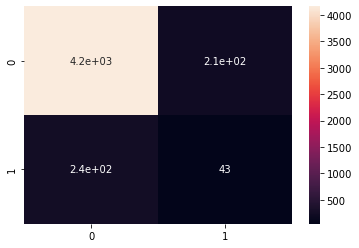

In [78]:
# Confusion matrix 
sns.heatmap(confusion_matrix(y_valid, gbr_preds), annot=True)